# 📚 NLP (Natural Language Processing) with Python

***


# 📝 Agenda

> 1. Introdução a NLP
> 2. Lendo Dataset com o Pandas
> 3. Análise Exploratória dos Dados
> 3. Pré-processamento dos Dados
> 4. Vetorização
> 5. Construindo e Avaliando Modelos

---

In [1]:
import re
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

# 📌 Introdução a NLP

O **Processamento de Linguagem Natural ou NLP** refere-se ao ramo da ciência da computação – e mais especificamente, o ramo da inteligência artificial ou IA – preocupado em dar aos computadores a capacidade de entender texto e palavras faladas da mesma maneira que os seres humanos.

A NLP combina linguística computacional – modelagem baseada em regras da linguagem humana – com modelos estatísticos, de aprendizado de máquina e aprendizado profundo. Juntas, essas tecnologias permitem que os computadores processem a linguagem humana na forma de texto ou dados de voz e 'compreendam' seu significado completo, com a intenção e o sentimento do falante ou escritor.

![](nlp.png)

# 💾 Lendo Dataset com o Pandas

In [2]:
sms = pd.read_csv("spam.csv", encoding='latin-1')
sms.dropna(how="any", inplace=True, axis=1) #remoção de valores nulos no dataframe
sms.columns = ['label', 'message'] 
sms.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
sms.message.iloc[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [4]:
sms.message.iloc[2]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

# 🔍 Análise Exploratória dos Dados

In [5]:
sms.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [6]:
sms.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [7]:
# converter a label para um valor númerico
sms['label_num'] = sms.label.map({'ham':0, 'spam':1})
sms.head()

,label,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [8]:
sms['message_len'] = sms.message.apply(len)
sms.head()

,label,message,label_num,message_len
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


Text(0.5, 0, 'Message Length')

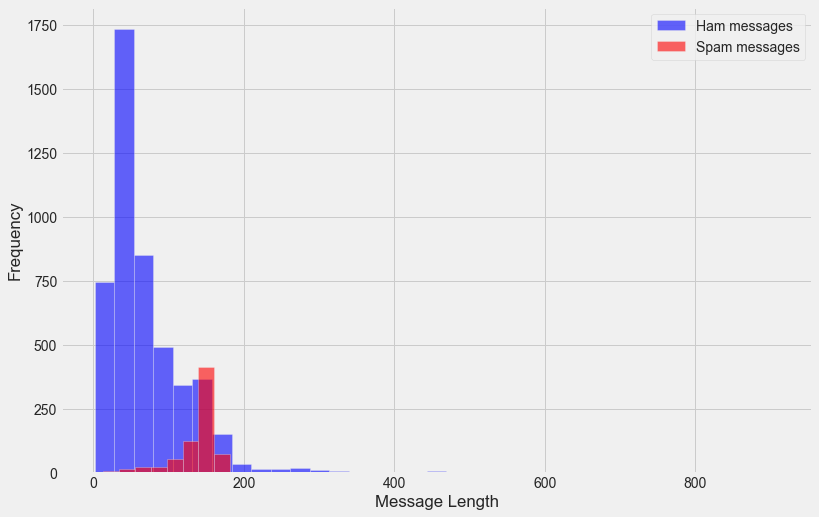

In [9]:
plt.figure(figsize=(12, 8))

sms[sms.label=='ham'].message_len.plot(bins=35, kind='hist', color='blue', 
                                       label='Ham messages', alpha=0.6)
sms[sms.label=='spam'].message_len.plot(kind='hist', color='red', 
                                       label='Spam messages', alpha=0.6)
plt.legend()
plt.xlabel("Message Length")

In [10]:
sms[sms.label=='ham'].describe()

,label_num,message_len
count,4825.0,4825.000000
mean,0.0,71.023627
std,0.0,58.016023
min,0.0,2.000000
25%,0.0,33.000000
50%,0.0,52.000000
75%,0.0,92.000000
max,0.0,910.000000


In [11]:
sms[sms.label=='spam'].describe()

,label_num,message_len
count,747.0,747.000000
mean,1.0,138.866131
std,0.0,29.183082
min,1.0,13.000000
25%,1.0,132.500000
50%,1.0,149.000000
75%,1.0,157.000000
max,1.0,224.000000


# 📑 Pré-processamento do Texto

> Agora vamos pré-processar os dados para facilitar a classificação do modelo.

> Esta seção é muito importante para reduzir as dimensões do problema.

## 🛠 Limpando corpus 

In [12]:
def clean_text(text):
    '''Tranformar o texto em letras minúsculas, remover texto entre colchetes, remover links, 
       remover pontuação e remover palavras que contenham números.'''
    
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [13]:
sms['message_clean'] = sms['message'].apply(clean_text)
sms.head()

,label,message,label_num,message_len,message_clean
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,0,29,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,free entry in a wkly comp to win fa cup final...
3,ham,U dun say so early hor... U c already then say...,0,49,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,nah i dont think he goes to usf he lives aroun...


### Remoção de stopwords

> Stopwords são palavras comumente usadas que não têm significado contextual em uma frase. Portanto, nós os removemos antes da classificação. 

> Alguns exemplos de remoção de palavras irrelevantes em português são:

In [14]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [15]:
print(stopwords.words('portuguese'))

['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'à', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'você', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivessem', 'estiver', 'estiv

In [16]:
stop_words = stopwords.words('english')
more_stopwords = ['u', 'im', 'c']
stop_words = stop_words + more_stopwords

def remove_stopwords(text):
    text = ' '.join(word for word in text.split(' ') if word not in stop_words)
    return text
    
sms['message_clean'] = sms['message_clean'].apply(remove_stopwords)
sms.head()

,label,message,label_num,message_len,message_clean
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,0,29,ok lar joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,free entry wkly comp win fa cup final tkts m...
3,ham,U dun say so early hor... U c already then say...,0,49,dun say early hor already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,nah dont think goes usf lives around though


## 🛠 Stemming 

### Stemming/ Lematização

> Por razões gramaticais, os documentos podem usar diferentes formas de uma palavra, como *escrever, escrevendo e escreveram*. Além disso, existem famílias de palavras derivadas com significados semelhantes. O objetivo tanto da derivação quanto da lematização é reduzir as formas flexionais e às vezes as formas derivadas de uma palavra a uma forma básica comum.

> **Stemming** geralmente se refere a um processo que corta as extremidades das palavras na esperança de atingir o objetivo corretamente na maioria das vezes e geralmente inclui a remoção de afixos derivacionais.

> **Lematização** geralmente se refere a fazer as coisas corretamente com o uso de um vocabulário e análise morfológica de palavras, normalmente com o objetivo de remover apenas terminações flexionais e retornar a forma base e de dicionário de uma palavra. Por exemplo, os verbos no tempo passado são alterados para presente (por exemplo, “foi” é alterado para “vai”) e os sinônimos são unificados (por exemplo, “melhor” é alterado para “bom”), padronizando palavras com significado semelhante à sua raiz. 

![](stemvslem.png)

> Na medida em que o significado das palavras não é importante para este estudo, vamos nos concentrar no stemming e não na lematização.

In [17]:
stemmer = nltk.SnowballStemmer("english")

def stemm_text(text):
    text = ' '.join(stemmer.stem(word) for word in text.split(' '))
    return text

In [18]:
sms['message_clean'] = sms['message_clean'].apply(stemm_text)
sms.head()

,label,message,label_num,message_len,message_clean
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,0,29,ok lar joke wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,free entri wkli comp win fa cup final tkts m...
3,ham,U dun say so early hor... U c already then say...,0,49,dun say earli hor alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,nah dont think goe usf live around though


# 🧮 Vetorização

> Atualmente, temos as mensagens como listas de tokens (também conhecidas como lemas) e agora precisamos converter cada uma dessas mensagens em um vetor com o qual os modelos de ML possam trabalhar.

## Saco de palavras (Bag-of-words)

> Cada vetor terá tantas dimensões quantas forem as palavras únicas no corpus. Primeiro, usaremos o **CountVectorizer** do SciKit Learn. Este modelo converterá uma coleção de documentos de texto em uma matriz de contagens de token.

![vectorization.png](vectorization.png)

## Frequência do Termo - Frequência Inversa do Documento (TF-IDF)

> O valor TF-IDF, é uma medida estatística que tem o intuito de indicar a importância de uma palavra de um documento em relação a uma coleção de documentos ou em um corpus linguístico.

![](tfidf.png)

## Word2Vec

> Word2Vec é um método estatístico para aprender eficientemente um Word Embedding independente, a partir de um corpus de texto.

> Considerado um dos maiores avanços no desenvolvimento do processamento de linguagem natural. 

> Cada palavra exclusiva em seus dados é atribuída a um vetor e esses vetores variam em dimensões dependendo do comprimento da palavra. 

> A representação é condicionada à distribuição do texto e apresenta características semânticas. Palavras com significado similar tem vetores próximos.
 

![](word2vec.png)

# Divisão de treino e teste

In [19]:
X = sms.message_clean
y = sms.label_num
print(X.shape)
print(y.shape)

(5572,)
(5572,)


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4179,)
(1393,)
(4179,)
(1393,)


### Saco de palavras

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()
vect.fit(X_train)

CountVectorizer()

In [22]:
X_train_dtm = vect.transform(X_train)
X_test_dtm = vect.transform(X_test)

In [23]:
X_train_dtm

<4179x5777 sparse matrix of type '<class 'numpy.int64'>'
	with 32766 stored elements in Compressed Sparse Row format>

### TF-IDF

In [24]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()

tfidf_transformer.fit(X_train_dtm)
X_train_tfidf = tfidf_transformer.transform(X_train_dtm)

X_train_tfidf

<4179x5777 sparse matrix of type '<class 'numpy.float64'>'
	with 32766 stored elements in Compressed Sparse Row format>

In [25]:
X_test_tfidf = tfidf_transformer.transform(X_test_dtm)
X_test_tfidf

<1393x5777 sparse matrix of type '<class 'numpy.float64'>'
	with 9716 stored elements in Compressed Sparse Row format>

# 🤖 Construindo e Avaliando Modelos

In [26]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

nb.fit(X_train_dtm, y_train)

MultinomialNB()

In [27]:
y_pred_class = nb.predict(X_test_dtm)

In [28]:
# calculate accuracy of class predictions
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

metrics.confusion_matrix(y_test, y_pred_class)

0.9777458722182341


array([[1200,   13],
       [  18,  162]], dtype=int64)

## TF-IDF com MLP

In [29]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train_tfidf, y_train)

y_pred = clf.predict(X_test_tfidf)

In [30]:
print(metrics.accuracy_score(y_test, y_pred))

metrics.confusion_matrix(y_test, y_pred)

0.9856424982053122


array([[1209,    4],
       [  16,  164]], dtype=int64)

## Word2Vec com Convolutional Neural Network

In [31]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

In [32]:
message = []
for i in sms.message_clean:
    message.append(i.split())
print(message[:2]) 

[['go', 'jurong', 'point', 'crazi', 'avail', 'bugi', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amor', 'wat'], ['ok', 'lar', 'joke', 'wif', 'oni']]


In [33]:
from gensim.models.word2vec import Word2Vec

word2vec_model = Word2Vec(message, size=500, window=3, min_count=1, workers=16)
print(word2vec_model)

Word2Vec(vocab=6767, size=500, alpha=0.025)


In [41]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

token = Tokenizer(6767)
token.fit_on_texts(sms.message_clean)
text_train = token.texts_to_sequences(X_train)
text_train = pad_sequences(text_train, padding='post', maxlen=75)
print(text_train[:1])

[[1604 1576 2434 2435 1231 2436   93 1231  690  560 2437 1232  328 1231
   170  222 1307 1923  327  985 1376  892 1307  410   98  486 2438  327
   985    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0]]


In [35]:
text_test = token.texts_to_sequences(X_test)
text_test = pad_sequences(text_test, padding='post', maxlen=75)

In [37]:
from keras.layers import Dense, Dropout, Conv1D, MaxPool1D, GlobalMaxPool1D, Embedding, Activation
from keras.models import Sequential

model = Sequential()
model.add(word2vec_model.wv.get_keras_embedding(True)) 
model.add(Dropout(0.2))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPool1D())
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(text_train, y_train, batch_size=16, epochs=10, validation_data=(text_test, y_test))

Epoch 1/10
262/262 [==============================] - 35s 133ms/step - loss: 0.2933 - accuracy: 0.8997 - val_loss: 0.0890 - val_accuracy: 0.9763
Epoch 2/10
262/262 [==============================] - 34s 129ms/step - loss: 0.0488 - accuracy: 0.9873 - val_loss: 0.0590 - val_accuracy: 0.9849
Epoch 3/10
262/262 [==============================] - 35s 133ms/step - loss: 0.0156 - accuracy: 0.9959 - val_loss: 0.0668 - val_accuracy: 0.9849
Epoch 4/10
262/262 [==============================] - 35s 132ms/step - loss: 0.0056 - accuracy: 0.9983 - val_loss: 0.0744 - val_accuracy: 0.9849
Epoch 5/10
262/262 [==============================] - 33s 124ms/step - loss: 0.0034 - accuracy: 0.9988 - val_loss: 0.0826 - val_accuracy: 0.9842
Epoch 6/10
262/262 [==============================] - 33s 124ms/step - loss: 0.0018 - accuracy: 0.9995 - val_loss: 0.0864 - val_accuracy: 0.9849
Epoch 7/10
262/262 [==============================] - 33s 128ms/step - loss: 0.0014 - accuracy: 0.9998 - val_loss: 0.0967 - val_ac

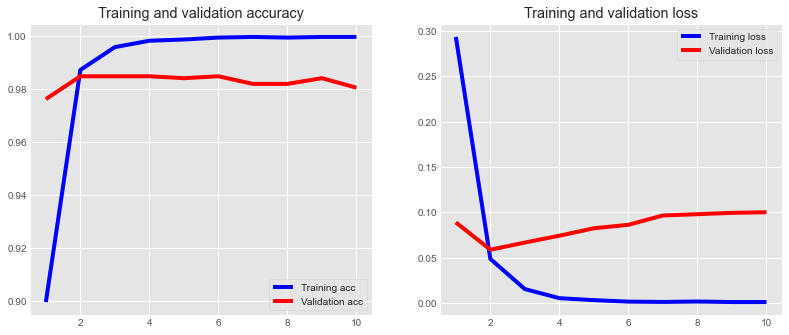

In [38]:
plot_history(history)

In [39]:
y_pred = (model.predict(text_test) > 0.5).astype("int32")
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [40]:
metrics.confusion_matrix(y_test, y_pred)

array([[1205,    8],
       [  19,  161]], dtype=int64)